# <font color=darkblue>CE 4363/5363 Groundwater Hydrology <br> Spring 2023 Exercise Set 1</font>

**LAST NAME, FIRST NAME**

**R00000000**

<hr>

### Purpose : 
Reinforce definitions of aquifer properties; apply propertities to quantitative cases
 
### Assessment Criteria : 
Completion, results plausible, format correct, example calculations shown.  
<hr>

# Exercise 1-1 (*Problem 3.7 pp. 110*)
A constant-head permeameter has a cross-sectional area of 78.5 cm$^2$. A sample is 23 cm long.  At an applied head differential of 3.4 cm, the permeameter discharges 50 cm$^3$ in 38 seconds.

Determine:
1. The hydraulic conductivity in centimeters per second.
2. The hydraulic conductivity in feet per day.
3. The intrinsic permeability if the measurement is conducted at 15$^o$C.
4. What type of soil is suggested by the hydraulic conductivity value.
<hr>

Solution:

Instrinsic permeability is temperature dependent, need water propereties at 15C.

![](waterproperties.png)

Now the rest of the problem

1. Using spreadsheet:

![](constantheadperm.png)

2. Using script:
Use formula:

$$ K=\frac{Q}{A} \frac{L}{h_1−h_2}$$

In [13]:
# script to compute K from constant head permeameter
dh = 3.4 #cm head loss
dl = 23.0 #cm sample length
dv = 50.0 #cc volume
dt = 38.0 #seconds
A  = 78.5 #cm^2 cross sectional area
density = 0.999
viscosity = 0.0114
# 
Q = dv/dt
K = (Q/A)*dl/dh
print("Input Values\n ------------------ ")
print("Head loss (cm)",round(dh,3))
print("Sample Length (cm)",round(dl,3))
print("Sample cross section (cm^2)",round(A,3))
print("Discharge volume (cc)",round(dv,3))
print("Discharge time (sec)",round(dt,3))
print("Density (g/cc)",round(density,3))
print("Viscosity (g/(s-cm))",round(viscosity,3))
print("\nComputed Values\n ------------------ ")
print("Hydraulic Conductivity K = ",round(K,3)," cm/sec ")
k = K*viscosity/(density*980)
print("Intrinsic Permeability k =",k," cm^2")


Input Values
 ------------------ 
Head loss (cm) 3.4
Sample Length (cm) 23.0
Sample cross section (cm^2) 78.5
Discharge volume (cc) 50.0
Discharge time (sec) 38.0
Density (g/cc) 0.999
Viscosity (g/(s-cm)) 0.011

Computed Values
 ------------------ 
Hydraulic Conductivity K =  0.113  cm/sec 
Intrinsic Permeability k = 1.3203192564108909e-06  cm^2


# Exercise 1-2 (*Problem 3.10 pp. 111*)
An aquifer has $S_y$ of 0.24. During a drought period, the following average water table declines were recorded:

|Area|Size(mi$^2$)|Decline(ft)|
|---:|---:|---:|
|A|12.5|1.33|
|B|19.8|0.88|
|C|23.8|3.98|
|D|9.56|2.34|
|E|12.3|4.44|
|F|7.22|0.34|

Determine:
1. The total volume of water represented by the decline in the water table.

<hr>

Solution - simple script:

In [18]:
identity = ["A","B","C","D","E","F"] #given
size = [12.5,19.8,23.8,9.56,12.3,7.22] #given
deltah = [1.33,0.88,3.98,2.34,4.44,0.34] #given
Sy = 0.24 #given
volume = [0 for i in range(len(identity))]
for i in range(len(identity)):
    volume[i]=Sy*deltah[i]*size[i]*5280*5280 #convert mi^2 to ft^2
total = sum(volume)
print("Total withdrawl",round(total,3),"cubic feet")
print("Total withdrawl",round(total/43560,3),"acre feet")

Total withdrawl 1393096137.523 cubic feet
Total withdrawl 31981.087 acre feet


# Exercise 1-3 (*Problem 3.13 pp. 111*)

A confined aquifer has a specific storage of $4.033 \times 10^{-3} m^{-1}$ and a porosity of 0.274.  The compressibility of water is $4.6 \times 10^{-10} m^2/N$.

Determine:
1. The compressibility of the aquifer skeleton.

<hr>

Use formula for specific storage:

$$S_s = \rho_w g (\alpha + n \beta)$$

Solve for $\alpha$

$$\frac{S_s}{\rho_w g} -  n \beta=  \alpha $$
A simple script:

In [33]:
sp_storage = 4.033E-3 #m^-1 given
n = 0.274 #given
beta = 4.6E-10 #m^2/N given, water compressibility
rho_w = 998.2 #kg/m^3 lookup
g     = 9.8 #m/s^2 lookup
alpha = sp_storage/(rho_w*g) - n*beta
print("Matrix compressibility",round(alpha,9),"m^2/N")

Matrix compressibility 4.12e-07 m^2/N


# Exercise 1-4 (*Problem 3.16 pp. 111*)

An aquifer has three different formations.  The uppermost formation A has a thickness of 8.4 m and a hydraulic conductivity of 22.3 m/day.  The middle formation B has a thickness of 2.8 m and a hydraulic conductivity of 144 m/day.  The lower formation C has a thickness of 33 m and a hydraulic conductivity of 35 m/day.  Each formation is homogeneous and isotropic.

Determine:
1. The overall horizontal hydraulic conductivity.
2. The overall horizontal vertical conductivity.
<hr>

Use induction to find pattern for horizontal and vertical flows based on:

Formation in series in direction of flow:

![](seriesformations.png)

Formations in parallel in direction of flow:

![](parallelformations.png)

In [38]:
# Script for our formations
K = [22.3,144.0,35.0] #K for each formation in m/day - given
b = [8.4,2.8,33.0] #b for each formation in m - given
# horizontal (parallel flow) composite K
numerator = 0.0
denominator = 0.0
for i in range(len(K)):
    numerator = numerator + K[i]*b[i]
    denominator = denominator + b[i]
K_horizontal = numerator/denominator
# vertical (series flow) composite K
numerator = 0.0
denominator = 0.0
for i in range(len(K)):
    numerator = numerator + b[i]
    denominator = denominator + b[i]/K[i]    
K_vertical = numerator/denominator

print("Composite K - horizontal",round(K_horizontal,3)," meters/day")
print("Composite K - vertical",round(K_vertical,3)," meters/day")

Composite K - horizontal 39.491  meters/day
Composite K - vertical 33.01  meters/day


# Exercise 1-5 (*Analysis B pp. 109*)

The figure below (*Fig. 3.32 pp. 110*) is a map showing the ground-water elevations in wells screened in an unconfined aquifer in Milwaukee, Wisconsin.  The aquifer is hydraulically connected to Lake Michigan, which has a surface elevation of 580 ft above MSL.  Lakes and streams are also depicted on the map.

![](http://54.243.252.9/ce-4363-webroot/2-Exercises/ES1/gwmap.png)

Determine:
1. Make a water-table contour map with a contour interval of 50 ft starting at 550 ft.
2. How groundwater levels are below the Lake Michigan surface elevation in part of the area.
<hr>

Solution:

1. Prepare the map for digitizing:
- Label each point (in red with cardinal numbers these will become rows of an XYZ file)
- Create an XY reference frame (in green to identify a 6X6 mile square)

![](gwmap_mod.png)

2. Convert the map into a JPG file (to use with Engauge) or similar digitizing program.

3. Digitize into an XYZ file  (Engauge on the shared server, see the MODFLOW notes to access server)

- Set up ENGAGE digitizer
![](points-complete.png)

- Set the coordinates
![](engage-intermediate.png)

- Digitize in small curve groups, transfer to CSV file for contouring

![](engage-begin.png)


4. Use a script to grid, then coutour the points. 


     INDEX        X        Y    Z
0        1   3.4272   1.4519  810
1        2   7.4337   0.6968  775
2        3  10.5134   1.0790  771
3        4  12.1328   1.6218  747
4        5  13.0687   2.2599  735
..     ...      ...      ...  ...
96      97  12.7196  24.8841  752
97      98  15.9789  23.9185  685
98      99  17.5343  24.1248  648
99     100   4.5456  25.2931  971
100    101   8.4919  24.9363  859

[101 rows x 4 columns]


Text(0.5, 1.0, 'Contour Plot from Gridded Data File')

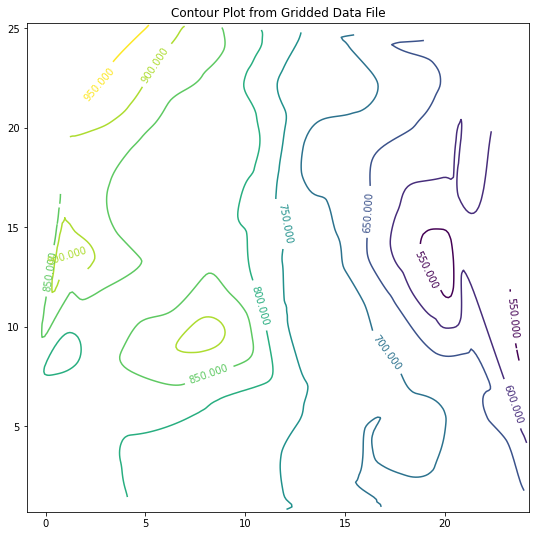

In [56]:
# CCMR from ENGR-1330:
# http://54.243.252.9/engr-1330-webroot/8-Labs/Lab07/Lab07.html
# https://clouds.eos.ubc.ca/~phil/docs/problem_solving/06-Plotting-with-Matplotlib/06.14-Contour-Plots.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
# https://stackoverflow.com/questions/18730044/converting-two-lists-into-a-matrix
# https://stackoverflow.com/questions/3242382/interpolation-over-an-irregular-grid
# https://stackoverflow.com/questions/33919875/interpolate-irregular-3d-data-from-a-xyz-file-to-a-regular-grid
import pandas
my_xyz = pandas.read_csv('gwmap_mod-points.csv',sep=',') # read an ascii file already prepared, delimiter is tabs
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
print(my_xyz) #examine the dataframe
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz['X'].values.tolist()
coord_y = my_xyz['Y'].values.tolist()
coord_z = my_xyz['Z'].values.tolist()
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x), max(coord_x), 200)
lat = numpy.linspace(min(coord_y), max(coord_y), 200)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use cubic spline interpolation (other choices are nearest and linear)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='cubic')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(9, 9)
levels = [550,600,650,700,750,800,850,900,950]
CS = ax.contour(X, Y, Z, levels, extent=[1, 25, 1, 25])
ax.clabel(CS, inline=2, fontsize=10)
ax.set_title('Contour Plot from Gridded Data File')

5. The final step would be to overlay onto the original basemap.  That requires PAINT or a similar image processing package.

An alternative to scripting is to use an on-line contouring tool such as [SimpleContourMap](http://54.243.252.9/toolbox/ordinarytools/SimpleContourMap/index.html)

1. Prepare the data file 
  - remove the index column
  - remove the header row
  - replace commas with spaces
  - run a DOS2UNIX utility (only if needed)
  
2. Upload the file using proper credentials:
  - USERNAME: TTUStudent
  - PASSWORT: id10t
  
![](onlineplot1.png)
  
3. Select gridding parameters and weighting schemes, label axes, and supply datafile name.

4. VIOLA - you gots a plot!  You might want to fuss with the weighting parameter and smoothing parameter and increase the grid specifications (50X50) is probably a good choice here. 

![](onlineplot2.png)


**How groundwater levels are below the Lake Michigan surface elevation in part of the area.**
In these locations there is likely a wellfield pumping water OUT of the aquifer.